# Check outputs

In [1]:
# Env: phd_v3
# To reload external files automatically (ex: utils)
%load_ext autoreload
%autoreload 2

import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import proplot as plot # New plot library (https://proplot.readthedocs.io/en/latest/)
plot.rc['savefig.dpi'] = 300 # 1200 is too big! #https://proplot.readthedocs.io/en/latest/basics.html#Creating-figures
from scipy import stats
import xesmf as xe # For regridding (https://xesmf.readthedocs.io/en/latest/)
import calendar
import os

In [2]:
pathC3 = '/home/lalandmi/eccc/classic-develop/outputFiles/SnowMIP/FR-Cdp_test/run_grassC3'
pathC4 = '/home/lalandmi/eccc/classic-develop/outputFiles/SnowMIP/FR-Cdp_test/run'

In [3]:
!ls {pathC3}

actlyr_daily.nc		   gpp_daily.nc		     ra_monthly.nc
actlyrmax_monthly.nc	   gpp_monthly.nc	     rh_daily.nc
actlyrmin_monthly.nc	   hfg_monthly.nc	     rh_monthly.nc
actlyr_monthly.nc	   hfls_daily.nc	     rls_daily.nc
albs_daily.nc		   hfls_monthly.nc	     rls_monthly.nc
albsir_daily.nc		   hfss_daily.nc	     rsds_monthly.nc
albs_monthly.nc		   hfss_monthly.nc	     rSoil_monthly.nc
albsn_daily.nc		   lai_daily.nc		     rss_daily.nc
albsn_monthly.nc	   lai_monthly.nc	     rss_monthly.nc
albsvis_daily.nc	   landCoverFrac_monthly.nc  sftlf.nc
bleafmas_daily.nc	   mrrob_daily.nc	     snc_daily.nc
cLeaf_daily.nc		   mrrob_monthly.nc	     snc_monthly.nc
cLeaf_monthly.nc	   mrroc_daily.nc	     snd_daily.nc
cRoot_daily.nc		   mrro_daily.nc	     snd_monthly.nc
cRoot_monthly.nc	   mrroi_daily.nc	     snm_daily.nc
cSoil_monthly.nc	   mrro_monthly.nc	     snw_daily.nc
cStem_daily.nc		   mrron_daily.nc	     snwdens_daily.nc
cStem_monthly.nc	   mrros_daily.nc	     snw_monthly.nc
cVeg_monthly.nc		 

As we generally start the C pools, etc. from zero it takes several runs to spin up sites. Especially the high-latitude sites tend to be slower to spin up. To check whether the model is spun up, we usually look at the outputs for NBP, soil C, etc. to see whether they’re relatively stable or close to zero for NBP averaged over several years. An easy check is to look at the ratio of NEP/NPP. We usually say that a site is spun up, if the absolute value of NEP/NPP is less than 0.02.

In [3]:
freq = 'daily'

tas_dailyC4 = xr.open_dataset(pathC4+'/tas_'+freq+'.nc').tas
snc_dailyC4 = xr.open_dataset(pathC4+'/snc_'+freq+'.nc').snc
snd_dailyC4 = xr.open_dataset(pathC4+'/snd_'+freq+'.nc').snd
snw_dailyC4 = xr.open_dataset(pathC4+'/snw_'+freq+'.nc').snw
nbp_dailyC4 = xr.open_dataset(pathC4+'/nbp_'+freq+'.nc').nbp # net mass flux of carbon from atmosphere into land
nep_dailyC4 = xr.open_dataset(pathC4+'/nep_'+freq+'.nc').nep # Natural flux of CO2 atm -> land
npp_dailyC4 = xr.open_dataset(pathC4+'/npp_'+freq+'.nc').npp # Carbon Mass Flux out of Atmosphere due to Net Primary Production
lai_dailyC4 = xr.open_dataset(pathC4+'/lai_'+freq+'.nc').lai # Carbon mass in the full depth of the soil model

albs_dailyC4 = xr.open_dataset(pathC4+'/albs_'+freq+'.nc').albs
albsn_dailyC4 = xr.open_dataset(pathC4+'/albsn_'+freq+'.nc').albsn

tsn_dailyC4 = xr.open_dataset(pathC4+'/tsn_'+freq+'.nc').tsn
ts_dailyC4 = xr.open_dataset(pathC4+'/ts_'+freq+'.nc').ts
wsnw_dailyC4 = xr.open_dataset(pathC4+'/wsnw_'+freq+'.nc').wsnw
tsl_dailyC4 = xr.open_dataset(pathC4+'/tsl_'+freq+'.nc').tsl
tcs_dailyC4 = xr.open_dataset(pathC4+'/tcs_'+freq+'.nc').tcs

In [4]:
tsl_dailyC4

<xarray.DataArray 'tsl' (time: 6940, layer: 20, lat: 1, lon: 1)>
[138800 values with dtype=float64]
Coordinates:
  * layer    (layer) int16 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20
  * time     (time) datetime64[ns] 1995-01-01 1995-01-02 ... 2013-12-31
Dimensions without coordinates: lat, lon
Attributes:
    long_name:   Temperature of each soil layer. Reported as missing for grid...
    units:       K
    nameInCode:  tbaracc_d

In [4]:
freq = 'daily'

tas_dailyC3 = xr.open_dataset(pathC3+'/tas_'+freq+'.nc').tas
snc_dailyC3 = xr.open_dataset(pathC3+'/snc_'+freq+'.nc').snc
snd_dailyC3 = xr.open_dataset(pathC3+'/snd_'+freq+'.nc').snd
snw_dailyC3 = xr.open_dataset(pathC3+'/snw_'+freq+'.nc').snw
nbp_dailyC3 = xr.open_dataset(pathC3+'/nbp_'+freq+'.nc').nbp # net mass flux of carbon from atmosphere into land
nep_dailyC3 = xr.open_dataset(pathC3+'/nep_'+freq+'.nc').nep # Natural flux of CO2 atm -> land
npp_dailyC3 = xr.open_dataset(pathC3+'/npp_'+freq+'.nc').npp # Carbon Mass Flux out of Atmosphere due to Net Primary Production
lai_dailyC3 = xr.open_dataset(pathC3+'/lai_'+freq+'.nc').lai # Carbon mass in the full depth of the soil model

albs_dailyC3 = xr.open_dataset(pathC3+'/albs_'+freq+'.nc').albs
albsn_dailyC3 = xr.open_dataset(pathC3+'/albsn_'+freq+'.nc').albsn

tsn_dailyC3 = xr.open_dataset(pathC3+'/tsn_'+freq+'.nc').tsn
ts_dailyC3 = xr.open_dataset(pathC3+'/ts_'+freq+'.nc').ts
wsnw_dailyC3 = xr.open_dataset(pathC3+'/wsnw_'+freq+'.nc').wsnw
tsl_dailyC3 = xr.open_dataset(pathC3+'/tsl_'+freq+'.nc').tsl
tcs_dailyC3 = xr.open_dataset(pathC3+'/tcs_'+freq+'.nc').tcs

/home/lalandmi/miniconda3/envs/phd_v3/lib/python3.8/site-packages/xarray/core/common.py:1123: FutureWarning: 'base' in .resample() and in Grouper() is deprecated.
The new arguments that you should use are 'offset' or 'origin'.

>>> df.resample(freq="3s", base=2)

becomes:

>>> df.resample(freq="3s", offset="2s")

  grouper = pd.Grouper(
/home/lalandmi/miniconda3/envs/phd_v3/lib/python3.8/site-packages/xarray/core/common.py:1123: FutureWarning: 'base' in .resample() and in Grouper() is deprecated.
The new arguments that you should use are 'offset' or 'origin'.

>>> df.resample(freq="3s", base=2)

becomes:

>>> df.resample(freq="3s", offset="2s")

  grouper = pd.Grouper(


Text(0.5, 0.98, 'Run Col de Porte (1995-2013)')

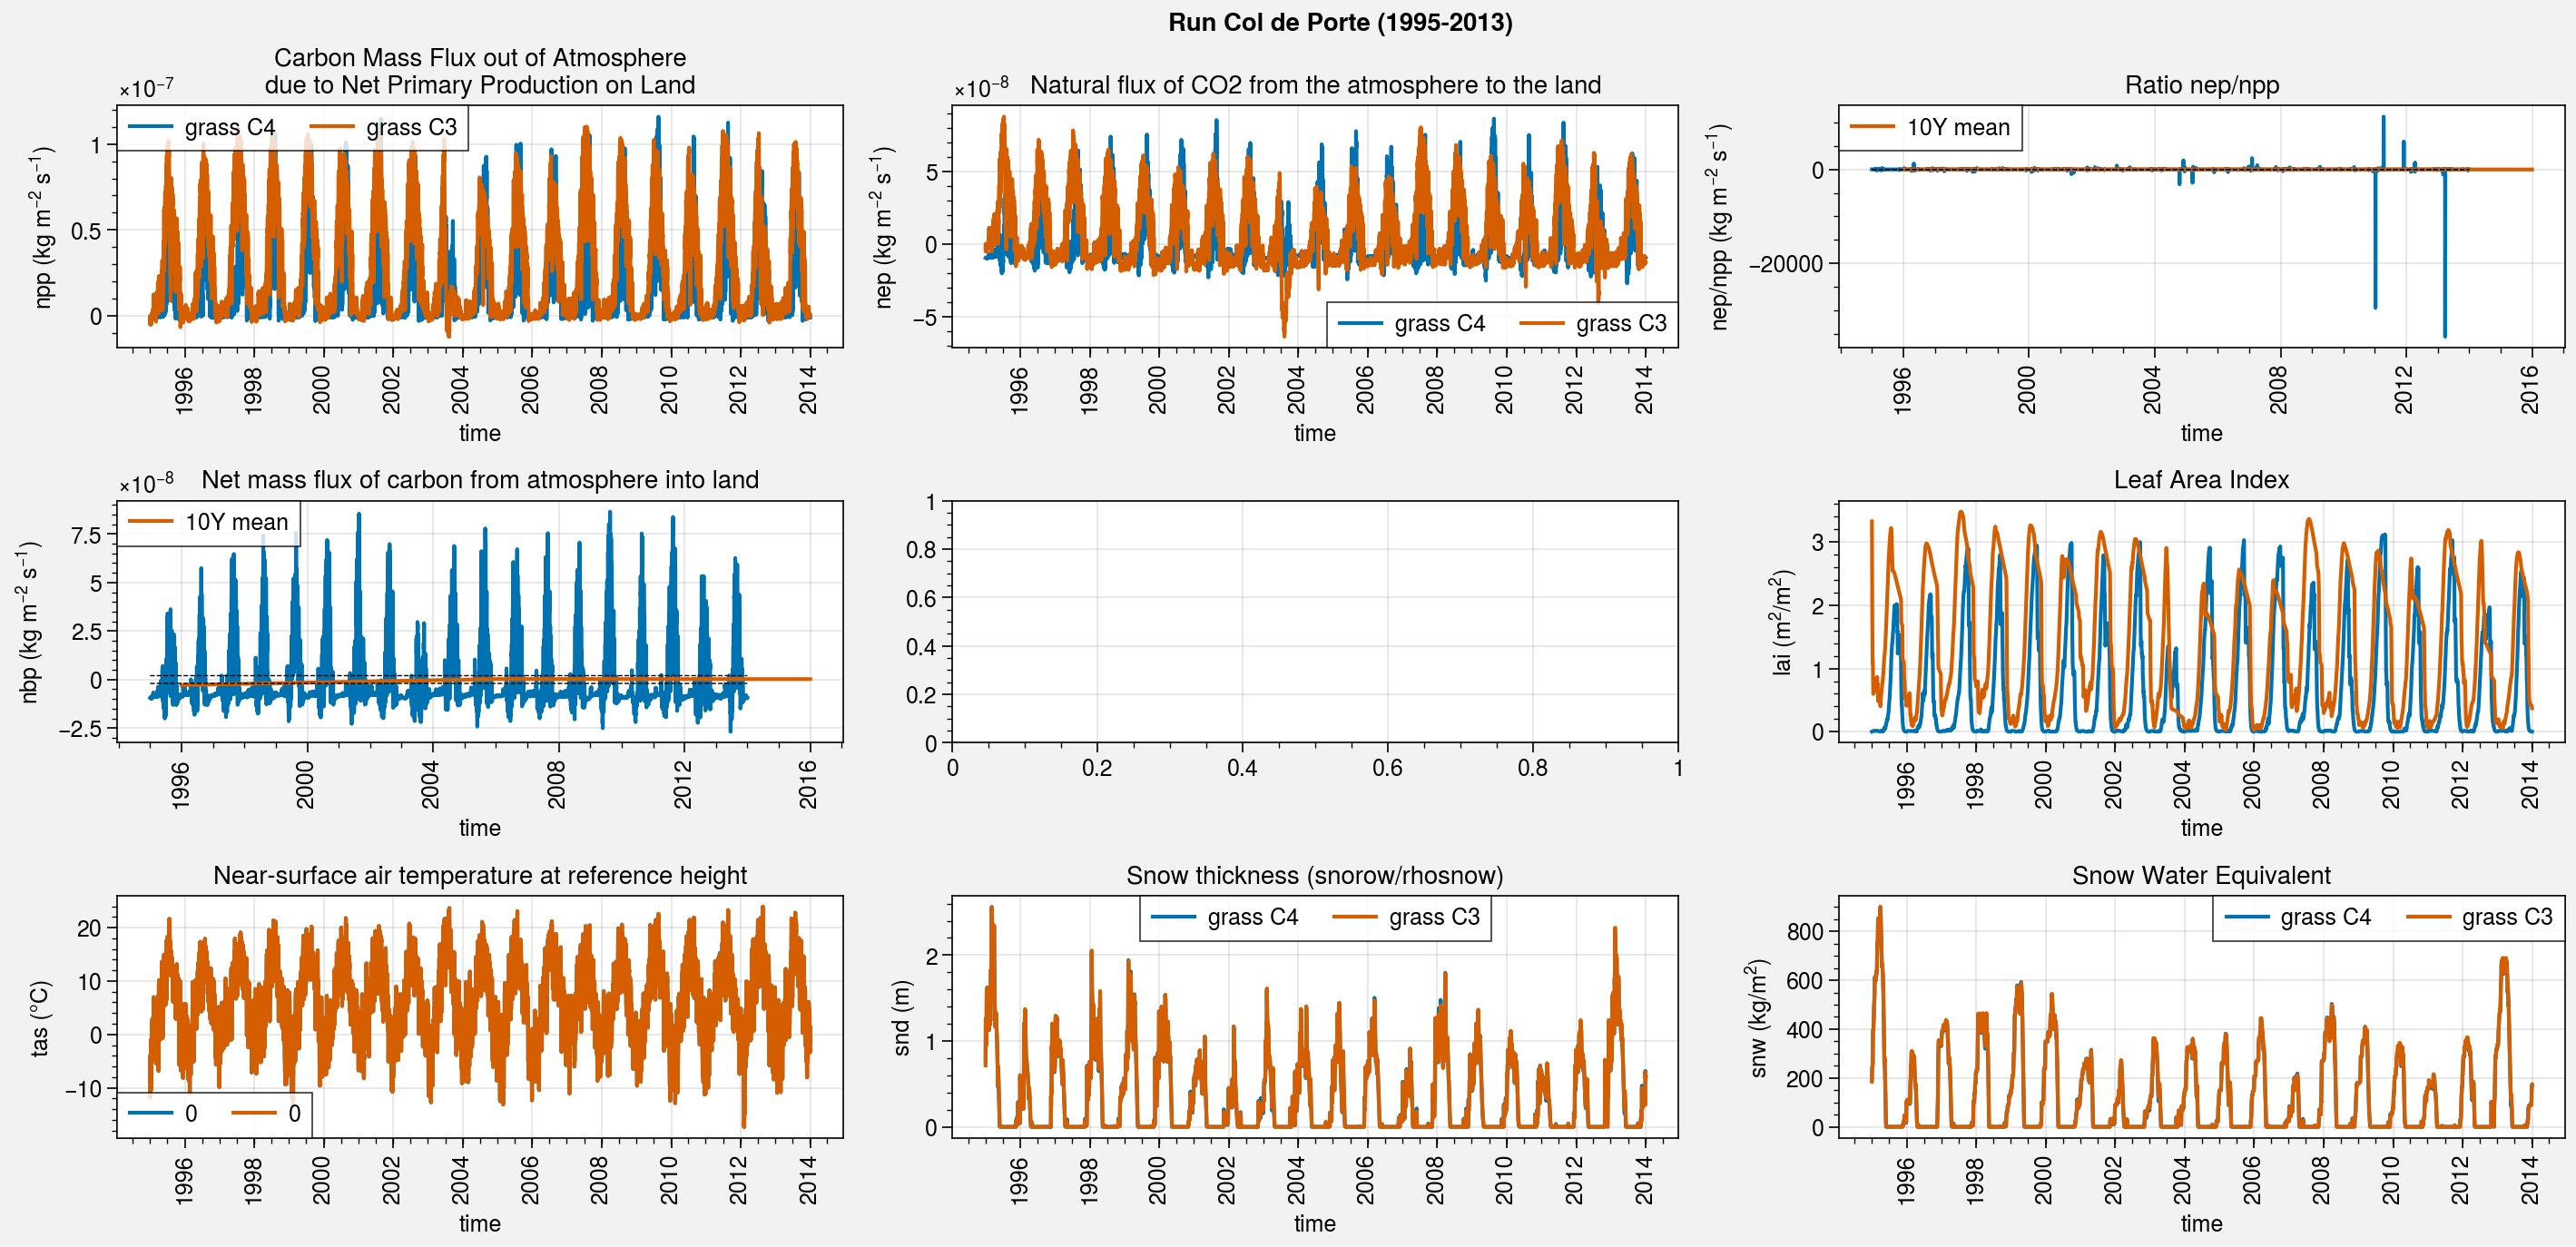

In [13]:
fig, axs = plot.subplots(ncols=3, nrows=3, aspect=3, axwidth=4, share=0)

# npp
axs[0].plot(npp_dailyC4, label='grass C4')
axs[0].plot(npp_dailyC3, label='grass C3')
axs[0].format(title='Carbon Mass Flux out of Atmosphere\ndue to Net Primary Production on Land', ylabel='npp ('+npp_dailyC4.units+')')
axs[0].legend()

# nep
axs[1].plot(nep_dailyC4, label='grass C4')
axs[1].plot(nep_dailyC3, label='grass C3')
axs[1].format(title='Natural flux of CO2 from the atmosphere to the land', ylabel='nep ('+nep_dailyC4.units+')')
axs[1].legend()

# nep/npp
axs[2].plot(nep_dailyC4/npp_dailyC4)
k = axs[2].plot((nep_dailyC4/npp_dailyC4).resample(time='10Y').mean(), label='10Y mean')
axs[2].plot(nep_dailyC4*0+0.2, color='k', lw=0.5, ls='--')
axs[2].plot(nep_dailyC4*0-0.2, color='k', lw=0.5, ls='--')
axs[2].format(title='Ratio nep/npp', ylabel='nep/npp ('+nep_dailyC4.units+')')
axs[2].legend(k)

# nbp
axs[3].plot(nbp_dailyC4)
axs[3].format(title='Net mass flux of carbon from atmosphere into land', ylabel='nbp ('+nbp_dailyC4.units+')')
k = axs[3].plot(nbp_dailyC4.resample(time='10Y').mean(), label='10Y mean')
axs[3].plot(nbp_dailyC4*0+0.2*10e-9, color='k', lw=0.5, ls='--')
axs[3].plot(nbp_dailyC4*0-0.2*10e-9, color='k', lw=0.5, ls='--')
axs[3].legend(k)

# cSoil
# axs[4].plot(cSoil_dailyC4)
# axs[4].format(title='Carbon mass in the full depth of the soil model', ylabel='cSoil ('+cSoil_dailyC4.units+')')

# lai
axs[5].plot(lai_dailyC4, label='grass C4')
axs[5].plot(lai_dailyC3, label='grass C3')
axs[5].format(title=lai_dailyC4.long_name, ylabel='lai ('+lai_dailyC4.units+')')

# tas
axs[6].plot(tas_dailyC4-273.15)
axs[6].plot(tas_dailyC3-273.15)
axs[6].format(title=tas_dailyC4.long_name, ylabel='tas (°C)')
axs[6].legend()

# snd
axs[7].plot(snd_dailyC4, label='grass C4')
axs[7].plot(snd_dailyC3, label='grass C3')
axs[7].format(title=snd_dailyC4.long_name, ylabel='snd ('+snd_dailyC4.units+')')
axs[7].legend()

# snw
axs[8].plot(snw_dailyC4, label='grass C4')
axs[8].plot(snw_dailyC3, label='grass C3')
axs[8].format(title='Snow Water Equivalent', ylabel='snw ('+snw_dailyC4.units+')')
axs[8].legend()

fig.suptitle('Run Col de Porte (1995-2013)')

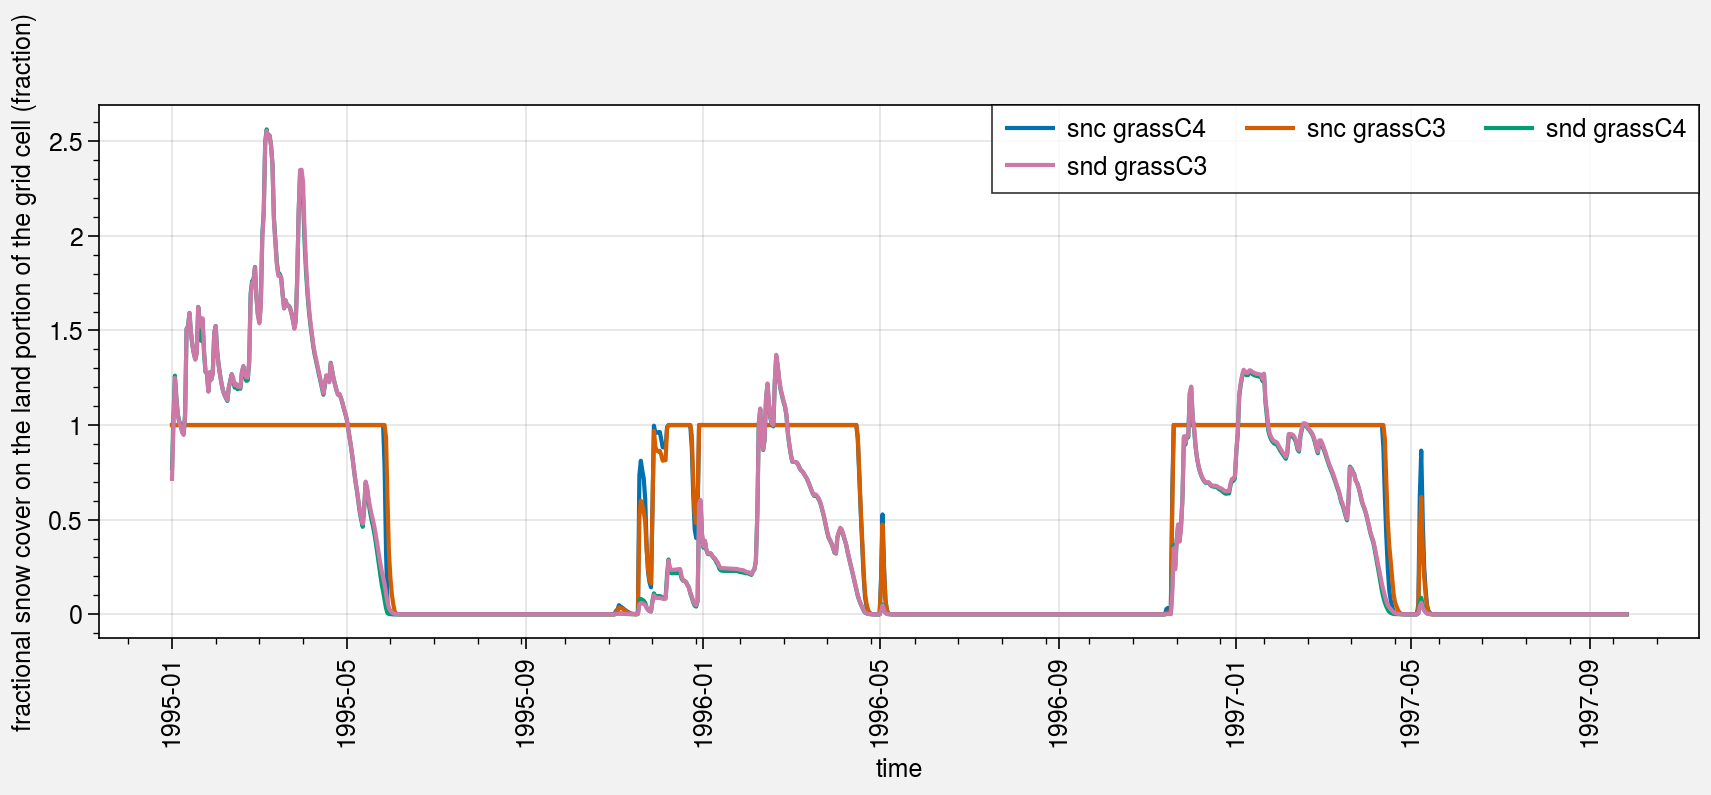

In [14]:
fig, axs = plot.subplots(ncols=1, nrows=1, aspect=3, axwidth=8)

i_start = 0
i_end = 1000

axs[0].plot(snc_dailyC4[0:i_end], label="snc grassC4")
axs[0].plot(snc_dailyC3[0:i_end], label="snc grassC3")
axs[0].plot(snd_dailyC4[0:i_end], label="snd grassC4")
axs[0].plot(snd_dailyC3[0:i_end], label="snd grassC3")
# axs[0].plot(snw[0:24])

axs[0].legend()


In [38]:
wsnw_dailyC3.long_name

'The total mass of liquid water contained interstitially within the whole depth of the snow pack of the land portion of a grid cell divided by the area of the land portion of the cell.'

Text(0.5, 0.98, 'Run Col de Porte (1995-2013)')

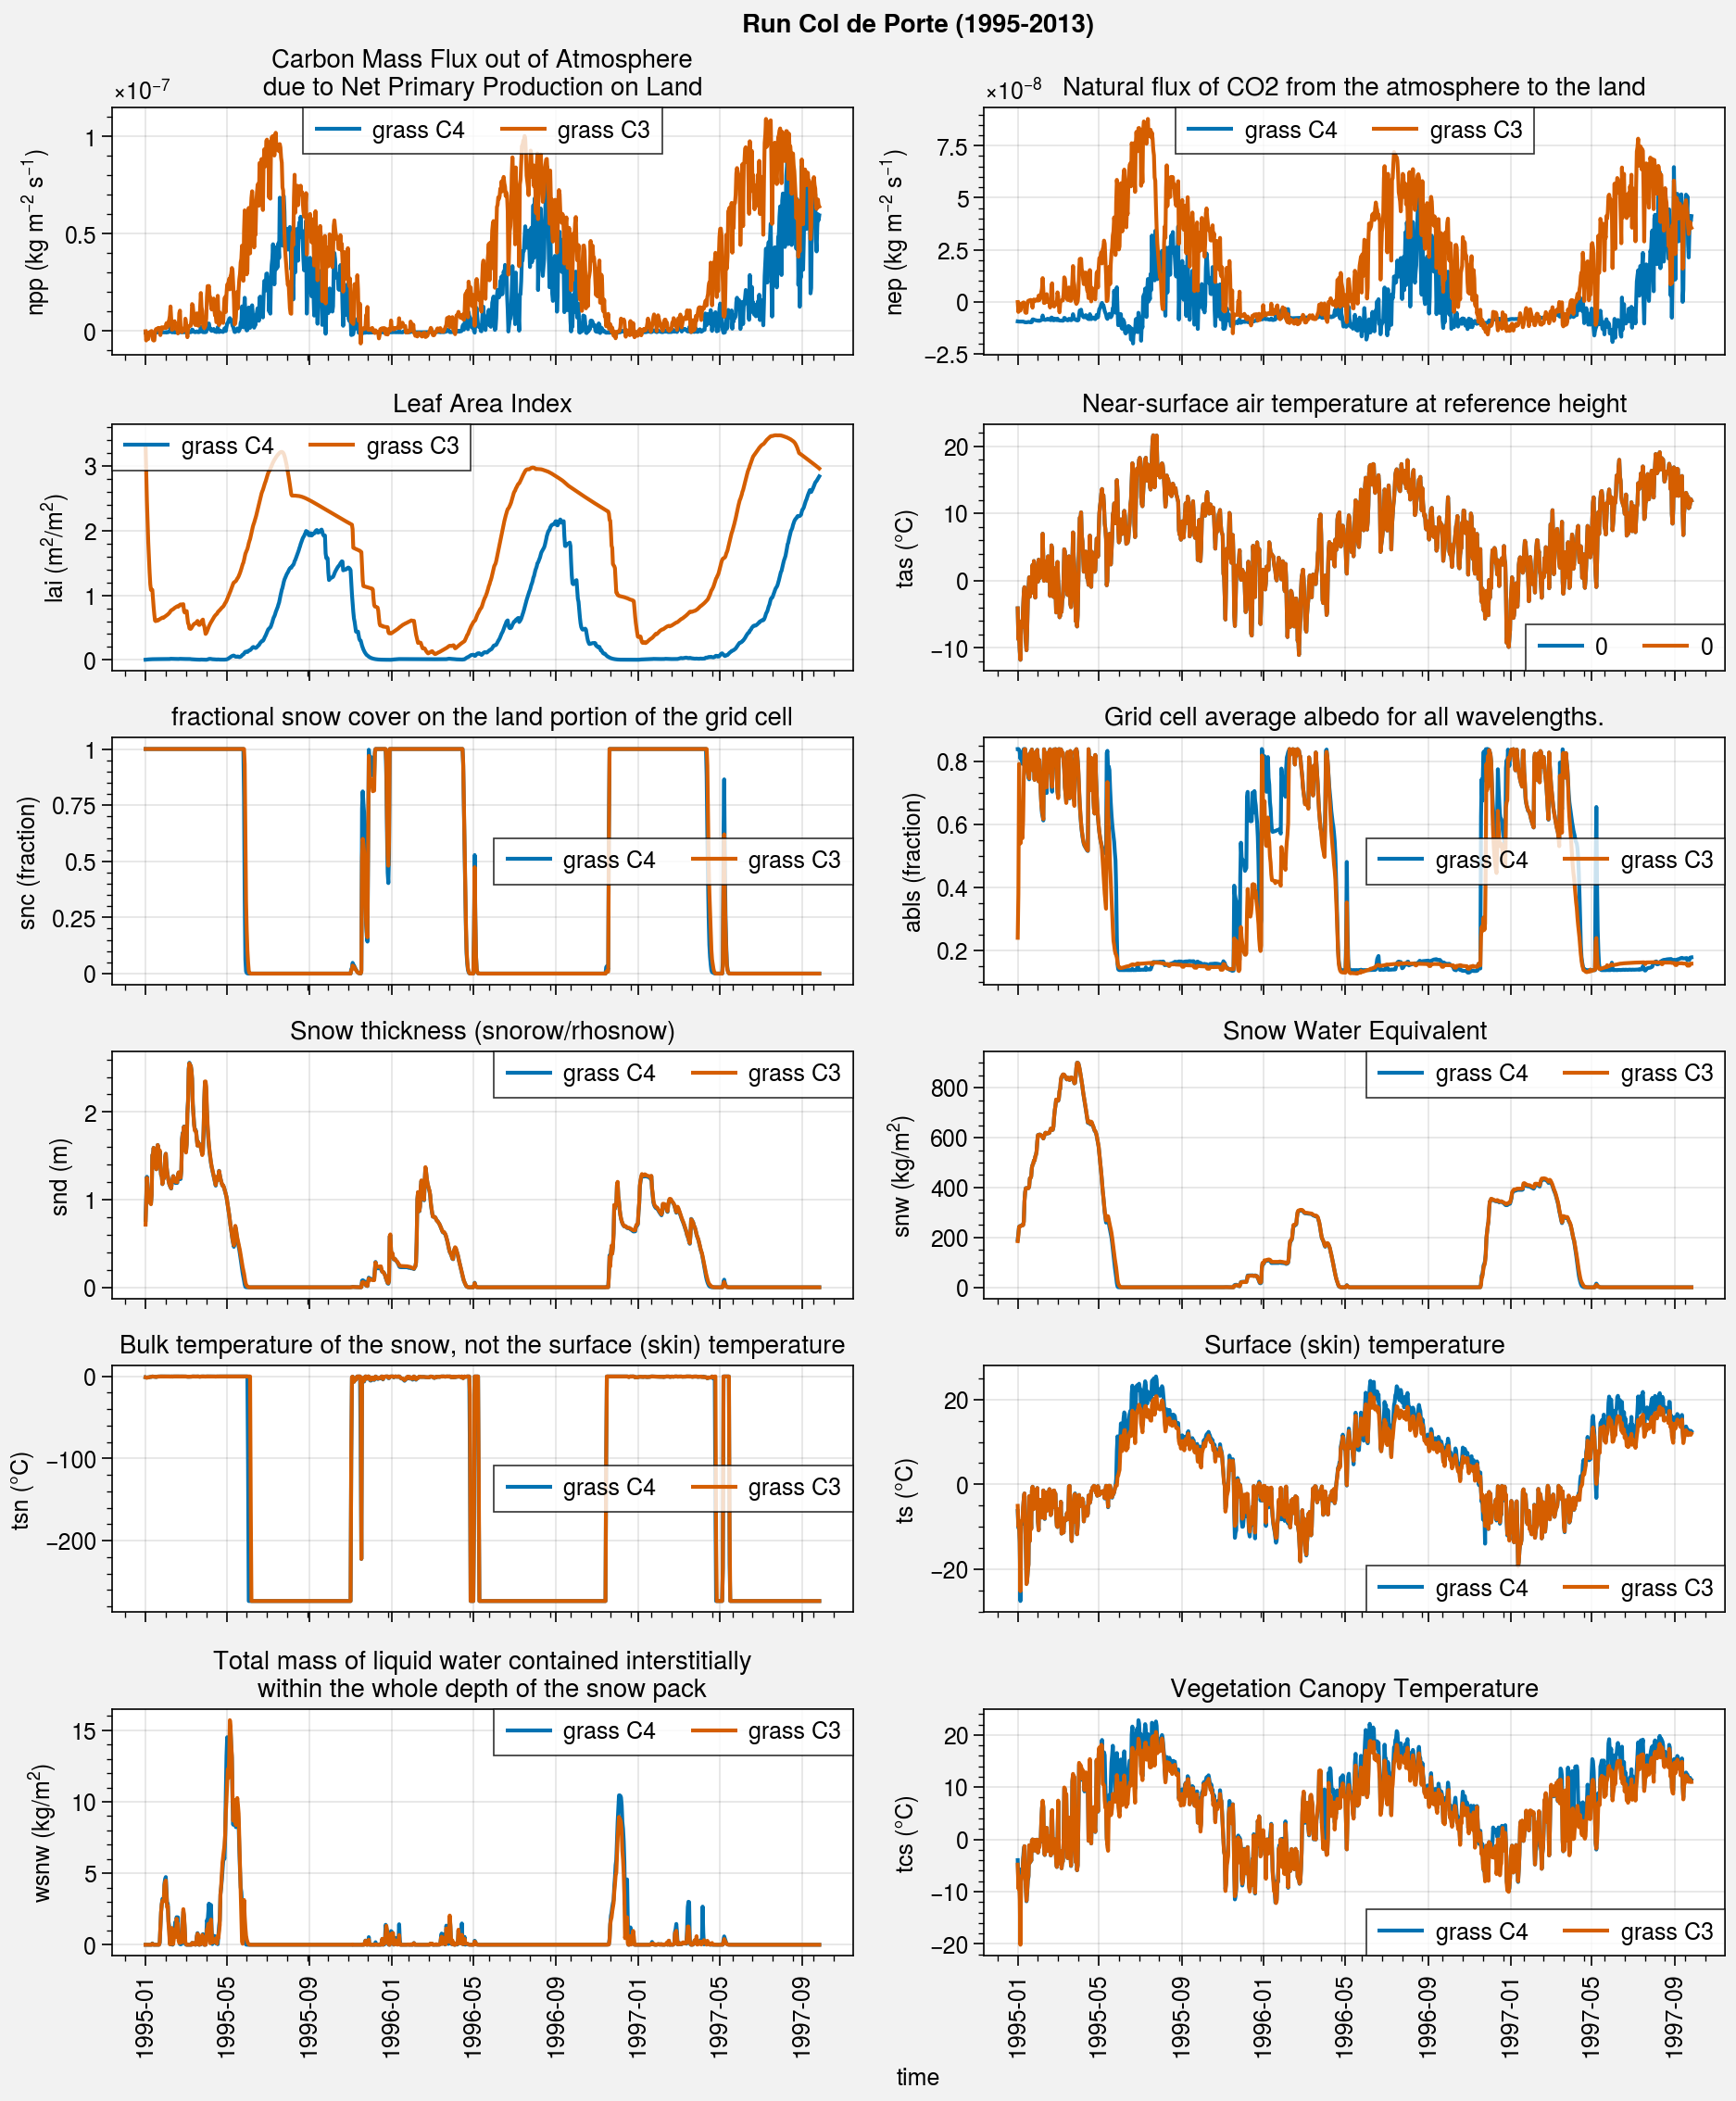

In [52]:
fig, axs = plot.subplots(ncols=2, nrows=6, aspect=3, axwidth=4, sharey=0)

# npp
axs[0].plot(npp_dailyC4[0:i_end], label='grass C4')
axs[0].plot(npp_dailyC3[0:i_end], label='grass C3')
axs[0].format(title='Carbon Mass Flux out of Atmosphere\ndue to Net Primary Production on Land', ylabel='npp ('+npp_dailyC4.units+')')
axs[0].legend()

# nep
axs[1].plot(nep_dailyC4[0:i_end], label='grass C4')
axs[1].plot(nep_dailyC3[0:i_end], label='grass C3')
axs[1].format(title='Natural flux of CO2 from the atmosphere to the land', ylabel='nep ('+nep_dailyC4.units+')')
axs[1].legend()

# lai
axs[2].plot(lai_dailyC4[0:i_end], label='grass C4')
axs[2].plot(lai_dailyC3[0:i_end], label='grass C3')
axs[2].format(title=lai_dailyC4.long_name, ylabel='lai ('+lai_dailyC4.units+')')
axs[2].legend()

# tas
axs[3].plot(tas_dailyC4[0:i_end]-273.15)
axs[3].plot(tas_dailyC3[0:i_end]-273.15)
axs[3].format(title=tas_dailyC4.long_name, ylabel='tas (°C)')
axs[3].legend()

# snc
axs[4].plot(snc_dailyC4[0:i_end], label='grass C4')
axs[4].plot(snc_dailyC3[0:i_end], label='grass C3')
axs[4].format(title=snc_dailyC4.long_name, ylabel='snc ('+snc_dailyC4.units+')')
axs[4].legend()

# abls
axs[5].plot(albs_dailyC4[0:i_end], label='grass C4')
axs[5].plot(albs_dailyC3[0:i_end], label='grass C3')
axs[5].format(title=albs_dailyC4.long_name, ylabel='abls ('+albs_dailyC4.units+')')
axs[5].legend()

# snd
axs[6].plot(snd_dailyC4[0:i_end], label='grass C4')
axs[6].plot(snd_dailyC3[0:i_end], label='grass C3')
axs[6].format(title=snd_dailyC4.long_name, ylabel='snd ('+snd_dailyC4.units+')')
axs[6].legend()

# snw
axs[7].plot(snw_dailyC4[0:i_end], label='grass C4')
axs[7].plot(snw_dailyC3[0:i_end], label='grass C3')
axs[7].format(title='Snow Water Equivalent', ylabel='snw ('+snw_dailyC4.units+')')
axs[7].legend()

# tsn
axs[8].plot(tsn_dailyC4[0:i_end]-273.5, label='grass C4')
axs[8].plot(tsn_dailyC3[0:i_end]-273.5, label='grass C3')
axs[8].format(title=tsn_dailyC4.long_name, ylabel='tsn (°C)')
axs[8].legend()

# ts
axs[9].plot(ts_dailyC4[0:i_end]-273.5, label='grass C4')
axs[9].plot(ts_dailyC3[0:i_end]-273.5, label='grass C3')
axs[9].format(title=ts_dailyC4.long_name, ylabel='ts (°C)')
axs[9].legend()

# wsnw
axs[10].plot(wsnw_dailyC4[0:i_end], label='grass C4')
axs[10].plot(wsnw_dailyC3[0:i_end], label='grass C3')
axs[10].format(title='Total mass of liquid water contained interstitially\nwithin the whole depth of the snow pack', ylabel='wsnw ('+snw_dailyC4.units+')')
axs[10].legend()

# tcs
axs[11].plot(tcs_dailyC4[0:i_end], label='grass C4')
axs[11].plot(tcs_dailyC3[0:i_end], label='grass C3')
axs[11].format(title=tcs_dailyC4.long_name, ylabel='tcs (°C)')
axs[11].legend()


# tsl_dailyC4 = xr.open_dataset(pathC4+'/tsl_'+freq+'.nc').tsl
# tcs_dailyC4 = xr.open_dataset(pathC4+'/tcs_'+freq+'.nc').tcs



fig.suptitle('Run Col de Porte (1995-2013)')

In [29]:
tsl_dailyC4.long_name

'Temperature of each soil layer. Reported as missing for grid cells with no land.'

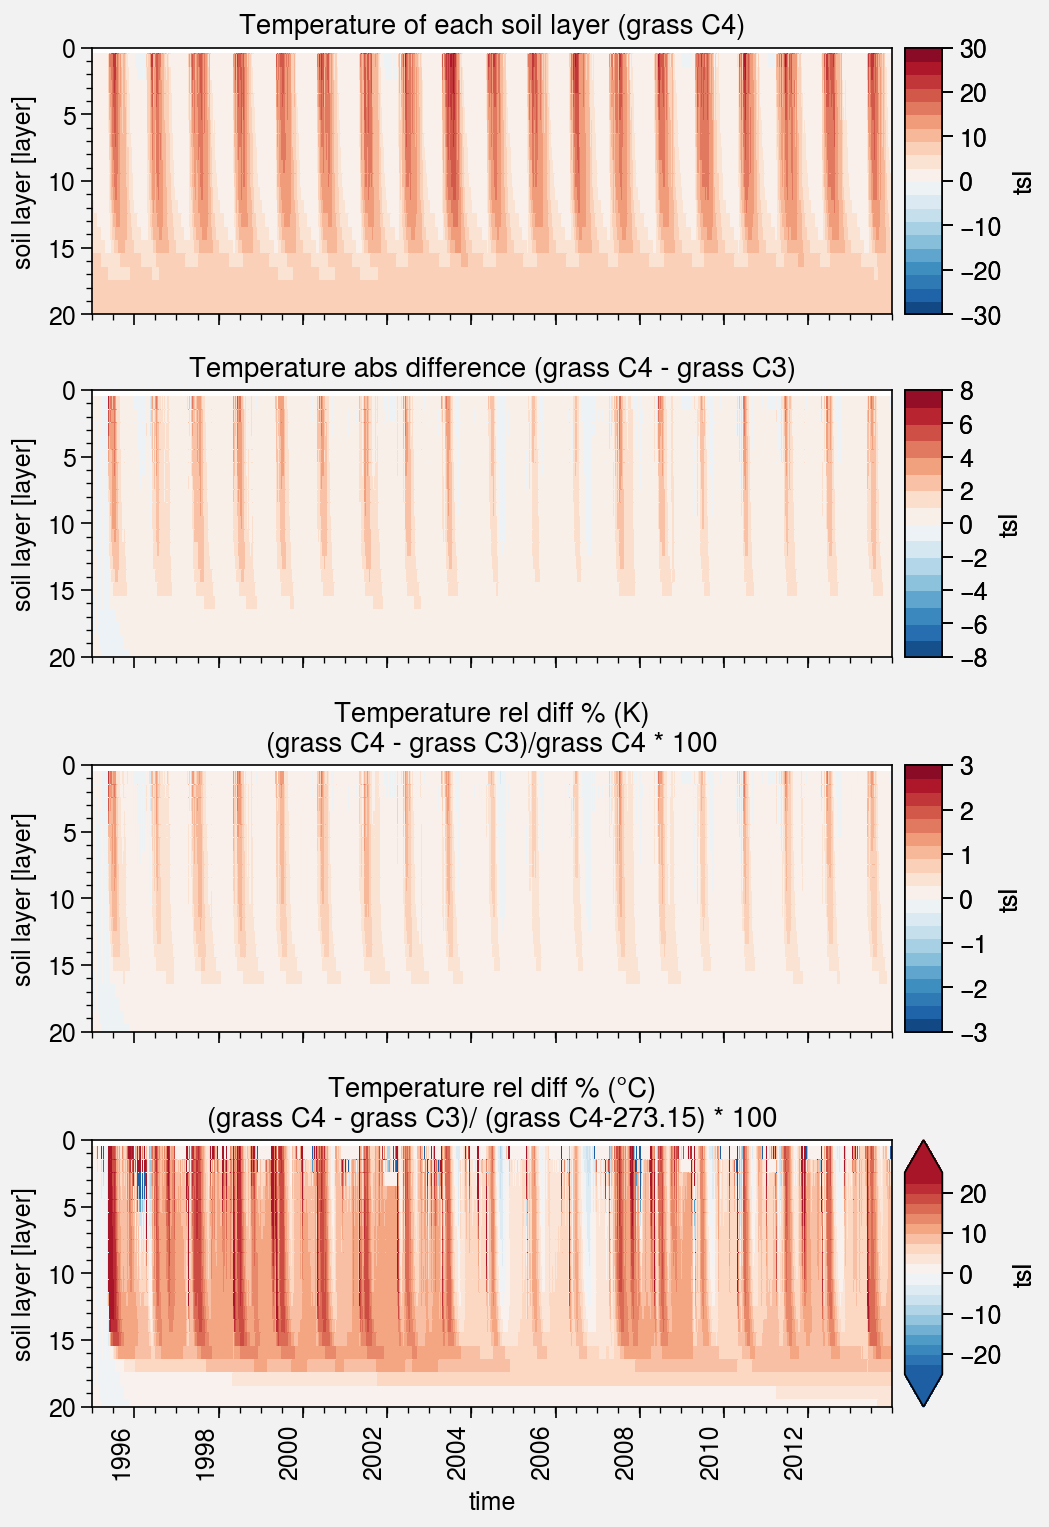

In [34]:
fig, axs = plot.subplots(ncols=1, nrows=4, aspect=3, axwidth=4, sharey=0)

(tsl_dailyC4-273.15).plot(x='time', ylim=(20, 0), ax=axs[0], levels=20)
axs[0].format(title='Temperature of each soil layer (grass C4)')

(tsl_dailyC4 - tsl_dailyC3).plot(x='time', ylim=(20, 0), ax=axs[1], levels=20)
axs[1].format(title='Temperature abs difference (grass C4 - grass C3)')

((tsl_dailyC4 - tsl_dailyC3)/tsl_dailyC4 * 100).plot(x='time', ylim=(20, 0), ax=axs[2], levels=20)
axs[2].format(title='Temperature rel diff % (K)\n(grass C4 - grass C3)/grass C4 * 100')

((tsl_dailyC4 - tsl_dailyC3)/ (tsl_dailyC4-273.15) * 100).plot(x='time', ylim=(20, 0), ax=axs[3], levels=20, robust=True)
axs[3].format(title='Temperature rel diff % (°C)\n(grass C4 - grass C3)/ (grass C4-273.15) * 100')
